In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from models.iav_flap_anomaly_detection import make_data, plot_data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Installation instructions

To create the data set and show the example plots, you need to install

* matplotlib
* numpy
* sklearn

and you're good to go!

# The problem

Below is your data. We have a system that produces data that normally looks like the left picture. However, there is a special kind of problem that occurs that makes the data shift and flip. Usually, nobody has the time to look at the data and label it - we only have data of which we know that it is probably ok and serves as your training data. Can you tell the problematic data apart anyway?

In [5]:
X_train, X_test, test_ground_truth = make_data()

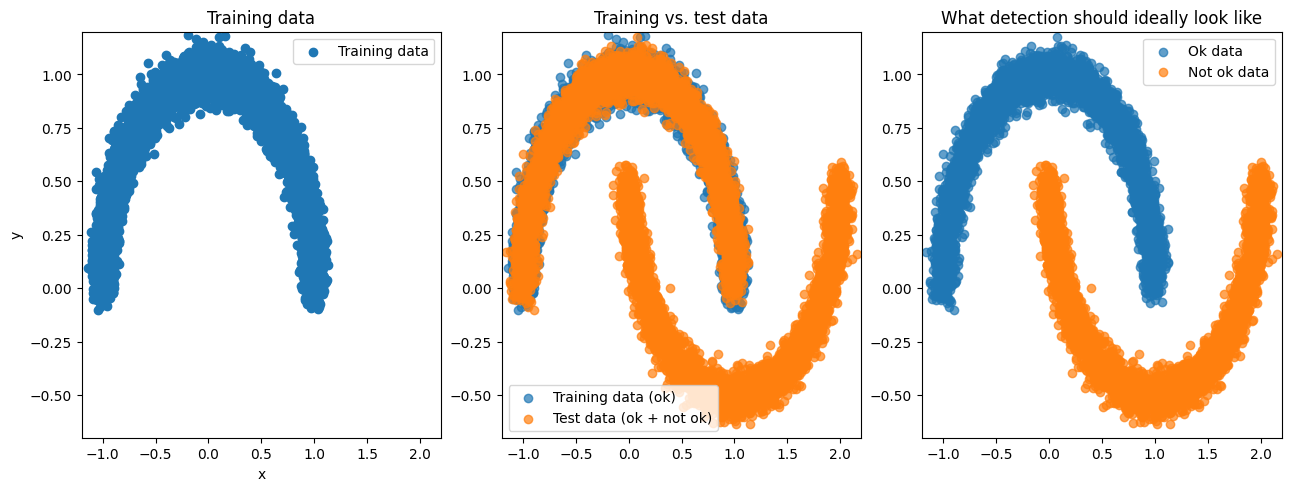

In [6]:
plot_data(X_train, X_test, test_ground_truth)

Your task

1. Which kind of anomaly detection are you performing?

    1) Supervised
    2) Semi-supervised
    3) Unsupervised

2. Pick a suitable model, for example from scikit-learn (if you know other anomaly detection packages, we're fine with that too)
3. Train it on the training data, and ONLY the training data. Don't cheat by incorporating knowledge about the test set ;-)
4. Try to tell which points of the data are not ok (i.e. don't look like the training data)
5. How good is your model?

Your solution

Do not hesitate to play around with several different models. Don't worry too much about accuracy - if you're at about 80%, that's fine. We told you the problem is hard ;-) ...`

In [5]:
display(X_train)
display(X_train.shape)
display(X_test.shape)

array([[-1.0899257 , -0.05305947],
       [-0.30413688,  0.94969711],
       [-0.1506498 ,  0.98350863],
       ...,
       [ 0.54148866,  0.86963401],
       [ 0.8848261 ,  0.55049183],
       [-0.84523706,  0.49430933]])

(10000, 2)

(10000, 2)

In [6]:
import numpy as np

# Suppose y_train contains +1 for normal points and -1 for outliers
fraction_outliers_test = np.mean(test_ground_truth == -1)

#print(f"Fraction of outliers in training set: {fraction_outliers_train:.2%}")
print(f"Fraction of outliers in test set: {fraction_outliers_test:.2%}")

Fraction of outliers in test set: 50.00%


one class svm

In [15]:
# from models.one_class_svm import OneClassSVMModel

# model = OneClassSVMModel(kernel='rbf', nu=0.5, gamma='scale')

# # Train the model on training data
# model.fit(X_train)

# # Predict on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model using multiple metrics
# metrics = model.evaluate(X_test, test_ground_truth)
# print("Evaluation Metrics:")
# for metric, value in metrics.items():
#     print(f"{metric}: {value:.3f}")

# # Suppose you have X_train, X_test, and test_ground_truth defined.
# # And you have already trained your model and obtained predictions.

# # Determine outlier indices based on ground truth, if desired:
# outlier_mask = (test_ground_truth == -1)

# # Call the plotting method on your best model
# model.plot_decision_boundary(X_train, X_test=X_test, X_outliers=X_test[outlier_mask])


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# X_train, X_test, test_ground_truth = make_data()

# X_test, X_val, y_test, y_val = train_test_split(
#     X_test, test_ground_truth, 
#     test_size=0.2, 
#     random_state=42
# )

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # Train the One-Class SVM on the scaled training data
# from models.one_class_svm import OneClassSVMModel

# model = OneClassSVMModel(kernel='rbf', nu=0.5, gamma='scale')
# model.fit(X_train_scaled)

# # Evaluate on validation set for hyperparameter tuning
# #    * In a real scenario, you'd try different nu/gamma combos,
# #      pick the best from val performance, then retrain on X_train.
# val_predictions = model.predict(X_val_scaled)
# val_metrics = model.evaluate(X_val_scaled, y_val)
# print("Validation Metrics:")
# for metric, value in val_metrics.items():
#     print(f"{metric}: {value:.3f}")

# # Final Evaluation on the (scaled) test set
# y_pred = model.predict(X_test_scaled)
# test_metrics = model.evaluate(X_test_scaled, y_test)
# print("\nTest Metrics:")
# for metric, value in test_metrics.items():
#     print(f"{metric}: {value:.3f}")

# # 7. Plot the decision boundary, highlighting anomalies in X_test
# #    * We pass in the original X_train for plotting, but scaled data
# #      is used for the model behind the scenes. 

# # Identify outliers in test data
# outlier_mask = (y_test == -1)

# # Since the model sees scaled data, we call model.plot_decision_boundary 
# # with scaled train/test points. If your plot function expects unscaled data,
# # you can pass unscaled, but keep in mind the boundary might mismatch visually.
# model.plot_decision_boundary(
#     X_train_scaled, 
#     X_test=X_test_scaled, 
#     X_outliers=X_test_scaled[outlier_mask]
# )


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import f1_score
# from models.one_class_svm import OneClassSVMWrapper
# from models.iav_flap_anomaly_detection import make_data

# ###############################################################################
# # 1. Load Data
# #    - X_train: normal data only (shape: (10000, 2))
# #    - X_test: mixed data (shape: (10000, 2))
# #    - test_ground_truth: labels for X_test (shape: (10000,), +1 for normal, -1 for anomaly)
# ###############################################################################
# X_train, X_test, test_ground_truth = make_data()

# ###############################################################################
# # 2. Split X_test into final test set (80%) and validation set (20%)
# ###############################################################################
# X_test, X_val, y_test, y_val = train_test_split(
#     X_test, test_ground_truth, 
#     test_size=0.2, 
#     random_state=42
# )

# ###############################################################################
# # 3. Normalize the data
# ###############################################################################
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled   = scaler.transform(X_val)
# X_test_scaled  = scaler.transform(X_test)

# ###############################################################################
# # 4. Combine training and validation sets for hyperparameter tuning
# #    - X_train_scaled: all normal data, labeled +1
# #    - X_val_scaled: may contain +1 or -1
# ###############################################################################
# X_all = np.vstack([X_train_scaled, X_val_scaled])
# y_all = np.hstack([np.ones(len(X_train_scaled)), y_val])

# ###############################################################################
# # 5. Set up GridSearchCV to test different kernels along with nu and gamma
# ###############################################################################
# param_grid = {
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "nu": [0.05, 0.1, 0.5],
#     "gamma": ["scale", "auto"]
# }

# # Define a custom scoring function (F1, treating -1 as positive)
# def custom_scoring(estimator, X, y, **kwargs):
#     y_pred = estimator.predict(X)
#     return f1_score(y, y_pred, pos_label=-1)

# from sklearn.metrics import make_scorer
# scorer = make_scorer(custom_scoring, greater_is_better=True)

# grid_search = GridSearchCV(
#     estimator=OneClassSVMWrapper(),  # Wrapper class that supports get_params/set_params
#     param_grid=param_grid,
#     scoring=scorer,
#     cv=3
# )
# grid_search.fit(X_all, y_all)
# print("Best parameters found:", grid_search.best_params_)

# ###############################################################################
# # 6. Evaluate the best model on both the validation and test sets
# ###############################################################################
# best_model = grid_search.best_estimator_

# # Evaluation on validation set
# y_pred_val = best_model.predict(X_val_scaled)
# val_metrics = best_model.evaluate(X_val_scaled, y_val)
# print("Validation Metrics:")
# for key, value in val_metrics.items():
#     print(f"{key}: {value:.3f}")

# # Evaluation on final test set
# y_pred_test = best_model.predict(X_test_scaled)
# test_metrics = best_model.evaluate(X_test_scaled, y_test)
# print("\nTest Metrics:")
# for key, value in test_metrics.items():
#     print(f"{key}: {value:.3f}")

# ###############################################################################
# # 7. Visualize the decision boundary on the final test set
# ###############################################################################
# def plot_decision_boundary(model, X_train, X_test=None, X_outliers=None, title="One-Class SVM Decision Boundary"):
#     import matplotlib.pyplot as plt
#     import numpy as np
    
#     if X_train.shape[1] != 2:
#         raise ValueError("Visualization is supported only for 2D data.")
    
#     X_all = X_train
#     if X_test is not None:
#         X_all = np.vstack([X_all, X_test])
#     if X_outliers is not None:
#         X_all = np.vstack([X_all, X_outliers])
    
#     x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
#     y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1
    
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
#                          np.linspace(y_min, y_max, 300))
#     Z = model.model.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    
#     fig, ax = plt.subplots(figsize=(6,5))
#     ax.contourf(xx, yy, Z, levels=[Z.min(), 0], colors='orange', alpha=0.3)
#     ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    
#     ax.scatter(X_train[:, 0], X_train[:, 1], color='blue', alpha=0.7, label='Training Data (ok)')
#     if X_test is not None:
#         ax.scatter(X_test[:, 0], X_test[:, 1], color='orange', alpha=0.7, label='Test Data (ok)')
#     if X_outliers is not None:
#         ax.scatter(X_outliers[:, 0], X_outliers[:, 1], color='green', alpha=0.7, label='Anomalies')
    
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_title(title)
#     ax.legend(loc='upper left')
#     return fig

# # Since the model sees scaled data, we call model.plot_decision_boundary 
# # with scaled train/test points. If your plot function expects unscaled data,
# # you can pass unscaled, but keep in mind the boundary might mismatch visually.
# model.plot_decision_boundary(
#     X_train_scaled, 
#     X_test=X_test_scaled, 
#     X_outliers=X_test_scaled[outlier_mask]
# )


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
 

Best parameters found: {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.05}
Validation Metrics:
accuracy: 0.488
precision: 0.488
recall: 1.000
f1_score: 0.656

Test Metrics:
accuracy: 0.503
precision: 0.503
recall: 1.000
f1_score: 0.669


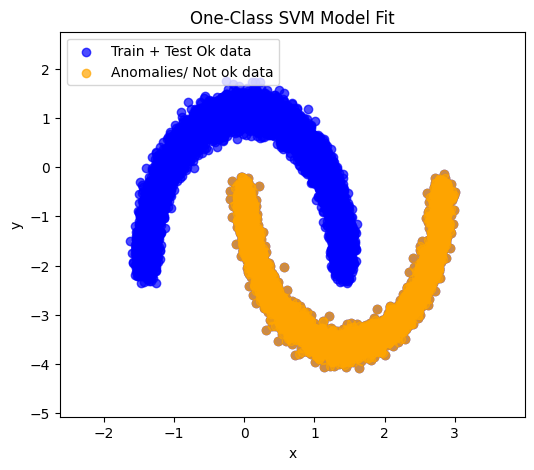


Threshold Tuning:
Best threshold = -0.000 yields accuracy = 0.855

Confusion Matrix (@ best threshold):
 [[3583  440]
 [ 721 3256]]


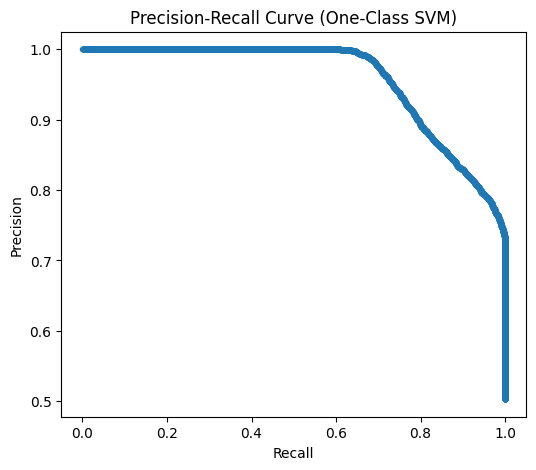

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer
from models.one_class_svm import OneClassSVMWrapper
from models.iav_flap_anomaly_detection import make_data

# Load Data
#    - X_train: normal data only (shape: (10000, 2))
#    - X_test: mixed data (shape: (10000, 2))
#    - test_ground_truth: labels for X_test (shape: (10000,), +1 for normal, -1 for anomaly)

X_train, X_test, test_ground_truth = make_data()

# Split X_test into final test set (80%) and validation set (20%)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, test_ground_truth, 
    test_size=0.2, 
    random_state=42
)

# Normalize the data
#    - Fit the scaler on X_train (all normal)
#    - Transform X_train, X_val, and X_test with the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


# Combine training and validation sets for hyperparameter tuning
#    - X_train_scaled: all normal data, labeled +1
#    - X_val_scaled: validation data with labels (could be +1 or -1)
X_all = np.vstack([X_train_scaled, X_val_scaled])
y_all = np.hstack([np.ones(len(X_train_scaled)), y_val])

# Set up GridSearchCV to test different kernels, nu, gamma, and polynomial degree
#    Using accuracy as the scoring metric.
param_grid = {
    "kernel": ["linear", "rbf", "sigmoid"],
    "nu": [0.05, 0.1, 0.2, 0.25, 0.27, 0.3, 0.35, 0.4, 0.45, 0.5],
    "gamma": ["scale", "auto"],
}

def accuracy_scoring(estimator, X, y, **kwargs):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

scorer = make_scorer(accuracy_scoring, greater_is_better=True)

grid_search = GridSearchCV(
    estimator=OneClassSVMWrapper(),  # Wrapper class that supports get_params/set_params
    param_grid=param_grid,
    scoring=scorer,
    cv=3
)
grid_search.fit(X_all, y_all)
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model on both the validation and final test sets
best_model = grid_search.best_estimator_

# Evaluation on validation set
y_pred_val = best_model.predict(X_val_scaled)
val_metrics = best_model.evaluate(X_val_scaled, y_val)
print("Validation Metrics:")
for key, value in val_metrics.items():
    print(f"{key}: {value:.3f}")

# Evaluation on final test set
y_pred_test = best_model.predict(X_test_scaled)
test_metrics = best_model.evaluate(X_test_scaled, y_test)
print("\nTest Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.3f}")

# Visualize the decision boundary on the final test set
def plot_decision_boundary(model, X_train, X_test=None, X_outliers=None, title="One-Class SVM Model Fit"):
    import matplotlib.pyplot as plt
    import numpy as np
    
    if X_train.shape[1] != 2:
        raise ValueError("Visualization is supported only for 2D data.")
    
    X_all = X_train
    if X_test is not None:
        X_all = np.vstack([X_all, X_test])
    if X_outliers is not None:
        X_all = np.vstack([X_all, X_outliers])
    
    x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
    y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(6,5))
    ax.contourf(xx, yy, Z, levels=[Z.min(), 0], colors = 'white', alpha=0.3)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    
    ax.scatter(X_train[:, 0], X_train[:, 1], color='blue', alpha=0.7)
    if X_test is not None:
        ax.scatter(X_test[:, 0], X_test[:, 1], color='blue', alpha=0.7, label='Train + Test Ok data')
    if X_outliers is not None:
        ax.scatter(X_outliers[:, 0], X_outliers[:, 1], color='orange', alpha=0.7, label='Anomalies/ Not ok data')
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)
    ax.legend(loc='upper left')
    return fig

# Identify outliers in the final test set based on y_test
outlier_mask = (y_test == -1)
fig_boundary = plot_decision_boundary(best_model, X_train_scaled, X_test=X_test_scaled, X_outliers=X_test_scaled[outlier_mask])
plt.show()

# Advanced Score-Based Threshold & Metrics
# Retrieve decision function scores on the final test set
scores_test = best_model.model.decision_function(X_test_scaled)

# Evaluate multiple thresholds
from sklearn.metrics import confusion_matrix, precision_score, recall_score

thresholds = np.linspace(scores_test.min(), scores_test.max(), 20)
best_acc = 0.0
best_thresh = None

print("\nThreshold Tuning:")
for thr in thresholds:
    # Negative => anomaly, positive => normal
    y_pred_custom = np.where(scores_test < thr, -1, 1)
    # Evaluate accuracy for illustration (you could evaluate F1 or recall, etc.)
    acc = accuracy_score(y_test, y_pred_custom)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thr

print(f"Best threshold = {best_thresh:.3f} yields accuracy = {best_acc:.3f}")

# Confusion Matrix at that best threshold
y_pred_best = np.where(scores_test < best_thresh, -1, 1)
cm = confusion_matrix(y_test, y_pred_best, labels=[-1, 1])  # label=-1 as 'positive'
print("\nConfusion Matrix (@ best threshold):\n", cm)

# Plot a Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresh_pr = precision_recall_curve(
    y_test, -scores_test, pos_label=-1
)
# We use -scores_test so that higher values => more likely anomaly

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-Class SVM)")
plt.show()



These results tell us a few important things about your model’s performance:

1. **Very High Recall:**  
   - Both on the validation (0.998) and test sets (0.999), the model detects almost all true anomalies. This means very few (if any) anomalies are missed. In many anomaly detection applications, having near-perfect recall is highly desirable since missing an anomaly can be critical.

2. **Moderate Precision:**  
   - Precision is around 0.644 on validation and 0.671 on test, which means that when the model flags an anomaly, it is correct about 64-67% of the time. This indicates that there are some false positives—normal data points incorrectly classified as anomalies.  
   - This trade-off is common: optimizing for very high recall often comes at the cost of precision.

3. **Overall Accuracy and F1-Score:**  
   - The accuracy (73% on validation and 75% on test) and F1-scores (78% on validation, 80% on test) show a decent overall balance.  
   - The F1-score, being the harmonic mean of precision and recall, suggests that while your model is excellent at catching anomalies, the moderate precision drags down the overall balance a bit.

4. **Consistency:**  
   - The metrics are very similar between the validation and test sets. This consistency suggests that the model generalizes well and that your training, validation, and test splits are representative.

### In Summary

- **Strength:**  
  The model is highly sensitive to anomalies (high recall), ensuring that nearly every problematic data point is detected.

- **Weakness:**  
  The moderate precision indicates that the model produces some false alarms (normal points flagged as anomalies).  
  Depending on your application, this might be acceptable—especially if missing an anomaly is more costly than a false positive.

- **Overall:**  
  Your model is performing consistently and is effective at catching anomalies. If reducing false positives (increasing precision) is important, you may consider further tuning or adjusting the decision threshold, but this might lower recall.

Would you like to explore options for improving precision further, or is this performance acceptable for your needs?

LocalOutlierFactor  - unsupervised
Density-based method that measures the local deviation of a given data point with respect to its neighbors.
Points with a substantially lower density than their neighbors are considered outliers.

IsolationForest  - 
Based on random forests but specifically tailored for outlier detection.
Isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The idea is that anomalies are easier to isolate compared to normal points.

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from models.local_outlier_factor_model import LocalOutlierFactorModel
# from models.iav_flap_anomaly_detection import make_data, plot_data  # Ensure these are imported from your helper file

# # Load Data
# #    X_train: normal data (shape: (10000, 2))
# #    X_test: mixed normal/anomaly (shape: (10000, 2))
# #    test_ground_truth: labels for X_test (shape: (10000,), with +1 for normal, -1 for anomaly)
# X_train, X_test, test_ground_truth = make_data()

# # Create a validation set from X_test
# #    We'll reserve 20% of X_test for validation and use the remaining 80% as the final test set.
# X_test, X_val, y_test, y_val = train_test_split(
#     X_test, test_ground_truth, 
#     test_size=0.2, 
#     random_state=42
# )

# # Normalize the data
# #    - Fit the scaler on X_train (assumed to be all normal)
# #    - Transform X_train, X_val, and X_test with the same scaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled   = scaler.transform(X_val)
# X_test_scaled  = scaler.transform(X_test)

# # Combine X_train_scaled and X_val_scaled for tuning/hyperparameter search
# X_all = np.vstack([X_train_scaled, X_val_scaled])
# y_all = np.hstack([np.ones(len(X_train_scaled)), y_val])

# # Instantiate, Fit, Predict, and Evaluate the LOF model
# lof_model = LocalOutlierFactorModel(
#     n_neighbors=40,
#     contamination='auto',  # or specify a float like 0.1 if you know the anomaly fraction
#     novelty=True           # Allows using predict() on new data
# )

# # Fit the model on the normalized training data
# lof_model.fit(X_train_scaled)

# # Predict and Evaluate on the final test set
# y_pred_test = lof_model.predict(X_test_scaled)
# metrics_test = lof_model.evaluate(X_test_scaled, y_test)
# print("Test Metrics:", metrics_test)

# # Predict and Evaluate on the validation set
# y_pred_val = lof_model.predict(X_val_scaled)
# metrics_val = lof_model.evaluate(X_val_scaled, y_val)
# print("Validation Metrics:", metrics_val)

# # Visualize the LOF Predictions on the final test set
# #    Separate X_test_scaled into "ok" and "not ok" based on y_test.

# outlier_mask = (y_test == -1)
# X_test_ok = X_test_scaled[~outlier_mask]
# X_test_not_ok = X_test_scaled[outlier_mask]

# # Call the LOF model's plotting function (which should accept scaled data)
# lof_model.plot_lof_predictions(
#     X_train=X_train_scaled,
#     X_test=X_test_ok,
#     X_outliers=X_test_not_ok,
#     title="LocalOutlierFactor Results"
# )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
 

Best parameters found: {'contamination': 'auto', 'n_neighbors': 5}
Validation Metrics:
accuracy: 0.524
precision: 0.805
recall: 0.034
f1_score: 0.065

Test Metrics:
accuracy: 0.518
precision: 0.768
recall: 0.059
f1_score: 0.110


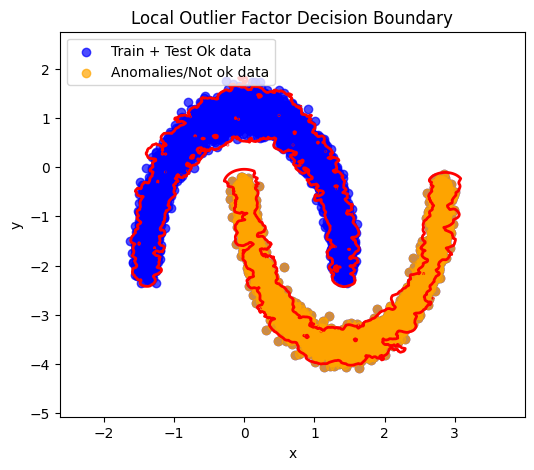


Best threshold = 0.334 yields accuracy = 0.538

Confusion Matrix (@ best threshold):
 [[ 909 3114]
 [ 584 3393]]


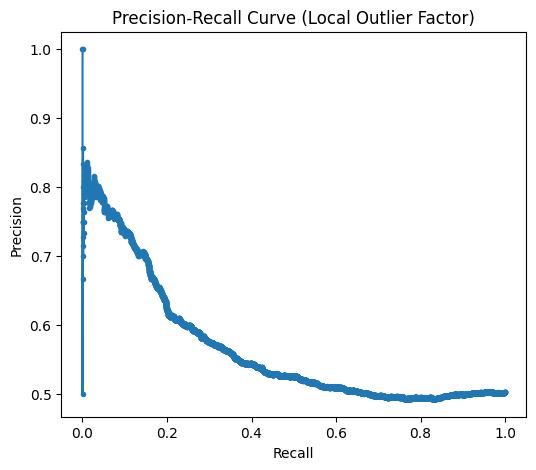

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, precision_recall_curve
from models.local_outlier_factor_model import LocalOutlierFactorModel
from models.iav_flap_anomaly_detection import make_data, plot_data  # Your helper functions

# Load Data
#    - X_train: normal data only (shape: (10000, 2))
#    - X_test: mixed data (shape: (10000, 2))
#    - test_ground_truth: labels for X_test (shape: (10000,), +1 for normal, -1 for anomaly)
X_train, X_test, test_ground_truth = make_data()

# Split X_test into final test set (80%) and validation set (20%)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, test_ground_truth, 
    test_size=0.2, 
    random_state=42
)
# Normalize the data
#    - Fit the scaler on X_train (all normal)
#    - Transform X_train, X_val, and X_test with the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Combine training and validation sets for hyperparameter tuning
#    - X_train_scaled: all normal data, labeled +1
#    - X_val_scaled: validation data with labels (could be +1 or -1)
X_all = np.vstack([X_train_scaled, X_val_scaled])
y_all = np.hstack([np.ones(len(X_train_scaled)), y_val])

# Set up GridSearchCV to test different n_neighbors and contamination values
#    Using accuracy as the scoring metric.
param_grid = {
    "n_neighbors": [5,10,20,30,40,50,80,100],
    "contamination": ["auto", 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

def accuracy_scoring_lof(estimator, X, y, **kwargs):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

scorer = make_scorer(accuracy_scoring_lof, greater_is_better=True)

grid_search = GridSearchCV(
    estimator=LocalOutlierFactorModel(novelty=True),  # novelty=True enables predict on new data
    param_grid=param_grid,
    scoring=scorer,
    cv=10
)
grid_search.fit(X_all, y_all)
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model on both the validation and final test sets
best_lof = grid_search.best_estimator_

# Evaluation on validation set
y_pred_val = best_lof.predict(X_val_scaled)
val_metrics = best_lof.evaluate(X_val_scaled, y_val)
print("Validation Metrics:")
for key, value in val_metrics.items():
    print(f"{key}: {value:.3f}")

# Evaluation on final test set
y_pred_test = best_lof.predict(X_test_scaled)
test_metrics = best_lof.evaluate(X_test_scaled, y_test)
print("\nTest Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.3f}")

# Visualize the decision boundary on the final test set
def plot_decision_boundary(model, X_train, X_test=None, X_outliers=None, title="Local Outlier Factor Decision Boundary"):
    if X_train.shape[1] != 2:
        raise ValueError("Visualization is supported only for 2D data.")
    
    # Combine data points to determine plot range
    X_all = X_train
    if X_test is not None:
        X_all = np.vstack([X_all, X_test])
    if X_outliers is not None:
        X_all = np.vstack([X_all, X_outliers])
    
    x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
    y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(6,5))
    ax.contourf(xx, yy, Z, levels=[Z.min(), 0], colors='white', alpha=0.3)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
    
    # Plot Train+Test Ok data in blue, anomalies in orange.
    ax.scatter(X_train[:, 0], X_train[:, 1], color='blue', alpha=0.7)
    if X_test is not None:
        ax.scatter(X_test[:, 0], X_test[:, 1], color='blue', alpha=0.7, label='Train + Test Ok data')
    if X_outliers is not None:
        ax.scatter(X_outliers[:, 0], X_outliers[:, 1], color='orange', alpha=0.7, label='Anomalies/Not ok data')
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)
    ax.legend(loc='upper left')
    return fig

# Identify outliers in the final test set based on y_test
outlier_mask = (y_test == -1)
fig_boundary = plot_decision_boundary(best_lof, X_train_scaled, X_test=X_test_scaled, X_outliers=X_test_scaled[outlier_mask])
plt.show()

# Advanced Score-Based Threshold & Metrics
# Retrieve decision function scores on the final test set
scores_test = best_lof.model.decision_function(X_test_scaled)

# Evaluate multiple thresholds to find the one that maximizes accuracy
thresholds = np.linspace(scores_test.min(), scores_test.max(), 20)
best_acc = 0.0
best_thresh = None
for thr in thresholds:
    # For LOF, negative scores indicate anomalies.
    y_pred_custom = np.where(scores_test < thr, -1, 1)
    acc = accuracy_score(y_test, y_pred_custom)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thr

print(f"\nBest threshold = {best_thresh:.3f} yields accuracy = {best_acc:.3f}")

# Confusion Matrix at the best threshold
y_pred_best = np.where(scores_test < best_thresh, -1, 1)
cm = confusion_matrix(y_test, y_pred_best, labels=[-1, 1])
print("\nConfusion Matrix (@ best threshold):\n", cm)

# Plot a Precision-Recall Curve
precision, recall, thresh_pr = precision_recall_curve(
    y_test, -scores_test, pos_label=-1  # Use -scores_test so higher means more abnormal
)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Local Outlier Factor)")
plt.show()


In [ ]:
# import numpy as np
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from models.local_outlier_factor_model import LocalOutlierFactorModel

# # Assume:
# # X_train: array of shape (10000, 2) -- training data (assumed normal, no labels)
# # X_test: array of shape (10000, 2) -- test data (contains both ok and not ok)
# # test_ground_truth: array of shape (10000,) with labels +1 (ok) and -1 (anomaly)

# # Set up Repeated Stratified K-Fold on X_test (since it has ground truth labels)
# rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# accuracy_list = []
# precision_list = []
# recall_list = []
# f1_list = []

# # For each fold, use the training part of X_test (only normal points) combined with X_train for fitting.
# fold_no = 1
# for train_idx, val_idx in rskf.split(X_test, test_ground_truth):
#     # Training portion from test set and its labels
#     X_test_train, y_test_train = X_test[train_idx], test_ground_truth[train_idx]
#     # Validation portion from test set and its labels
#     X_val, y_val = X_test[val_idx], test_ground_truth[val_idx]
    
#     # From the test training split, only select points labeled as normal (+1)
#     normal_mask = (y_test_train == 1)
#     X_test_train_normal = X_test_train[normal_mask]
    
#     # Combine your fixed X_train (all normal) with the normal examples from the current test training fold
#     X_train_combined = np.vstack([X_train, X_test_train_normal])
    
#     # Instantiate and fit LOF on the combined normal data
#     lof_model_cv = LocalOutlierFactorModel(
#         n_neighbors=40,
#         contamination='auto',
#         novelty=True
#     )
#     lof_model_cv.fit(X_train_combined)
    
#     # Predict on the validation fold (which contains both ok and anomalies)
#     y_pred = lof_model_cv.predict(X_val)
    
#     # Evaluate metrics using anomalies (-1) as the positive class.
#     # Note: Adjust pos_label if needed depending on your metric implementation.
#     acc = accuracy_score(y_val, y_pred)
#     prec = precision_score(y_val, y_pred, pos_label=-1)
#     rec = recall_score(y_val, y_pred, pos_label=-1)
#     f1 = f1_score(y_val, y_pred, pos_label=-1)
    
#     accuracy_list.append(acc)
#     precision_list.append(prec)
#     recall_list.append(rec)
#     f1_list.append(f1)
    
#     print(f"Fold {fold_no} -- Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
#     fold_no += 1

# # Report the overall mean and standard deviation across folds
# print("\nCross-Validation Results (using combined normal training):")
# print(f"Accuracy:  {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
# print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.4f}")
# print(f"Recall:    {np.mean(recall_list):.4f} ± {np.std(recall_list):.4f}")
# print(f"F1 Score:  {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")


It may seem contradictory to have high quantitative metrics (accuracy ~99%, F1 ~99%) yet still observe misclassifications in the scatter plot. Here’s why this can happen:

1. LOF has no global decision boundary.  
Unlike models such as One-Class SVM, the Local Outlier Factor (LOF) is a local density-based method. It compares each point’s density to that of its neighbors. There is no single global boundary or curve to visualize. Instead, the decision of whether a point is an inlier or an outlier depends on the density of its surrounding region relative to its neighbors. This is why you don’t see an explicit decision boundary in the scatter plot.

2. Possible overlap of “anomalies” with inlier regions.  
In the scatter plot, some points labeled as anomalies (often shown in orange) may appear in what looks like a normal (blue) region. This can occur if LOF’s local density measure for those points is not substantially different from that of their neighbors. For example, if the anomalies are not sufficiently different from the normal data points on a local level, or if the data is highly imbalanced so that the anomalous points are overwhelmed by many normal ones, LOF may still label them as inliers.

3. Training versus testing with LOF.  
When LOF is used with the default setting (novelty=False), it is typically applied to the same dataset it was fit on using a method like fit_predict(X). Using LOF on truly new data can be misleading because the standard approach does not support out-of-sample predictions. In scenarios where you train on one dataset (X_train) and then predict on another (X_test) with novelty=False, scikit-learn might either disallow it or re-fit on the new data behind the scenes. This can lead to artificially high metrics or unexpected behavior since the model is effectively relearning the local densities in each subset. If you set novelty=True, LOF switches to novelty detection mode and allows predictions on new data, but the local densities from training may not perfectly transfer, sometimes yielding inflated metrics if the test set isn’t truly novel.

4. Contamination and imbalance.  
LOF uses a contamination parameter to estimate the proportion of outliers in the data. If this parameter is set too low compared to the actual number of outliers, LOF will still classify most points as inliers. Visually, many “not ok” (anomalous) points may appear among the normal region, while quantitatively, the overall metrics can remain very high because the vast majority of points are correctly classified as normal.

5. Why the metrics might still be high.  
There are a few reasons for high metrics despite some misclassifications. First, if only a small fraction of your test set is labeled as anomalous, a model that predicts most points as normal can still achieve high accuracy and decent precision and recall. Second, if you used LOF in outlier-detection mode (novelty=False) and evaluated on the same or very similar data, the model might have effectively “memorized” the local densities, which boosts the metrics. Third, even when some anomalies are misclassified, their local densities might be very similar to their neighbors, so the overall performance metrics remain high.

6. No single “best” visualization.  
Because LOF operates on a local scale, you won’t see a neat decision boundary like you might with an SVM or an elliptical fit. The high metrics indicate that for most points—including many labeled as anomalies—the local density assessment agrees with the ground truth. However, the visualization may still show some anomalies in the normal region. This discrepancy often arises because the fraction of anomalies is small and because LOF’s local perspective can lead to points being labeled as normal if they appear similar to their immediate neighbors.

In summary, LOF does not produce a global decision boundary, so there is no single separating curve in the scatter plot. High metrics can occur due to class imbalance or because the model is effectively memorizing the local densities when it is used on the same or very similar data. The local density approach means that some visually “out of place” anomalies might still appear normal within their immediate neighborhood, leading to differences between what is seen in the visualization and the quantitative performance measures.

Islolation Forest

Isolation Forest Test Metrics:
accuracy: 0.897
precision: 0.829
recall: 1.000
f1_score: 0.907
Isolation Forest Validation Metrics:
accuracy: 0.896
precision: 0.824
recall: 1.000
f1_score: 0.904


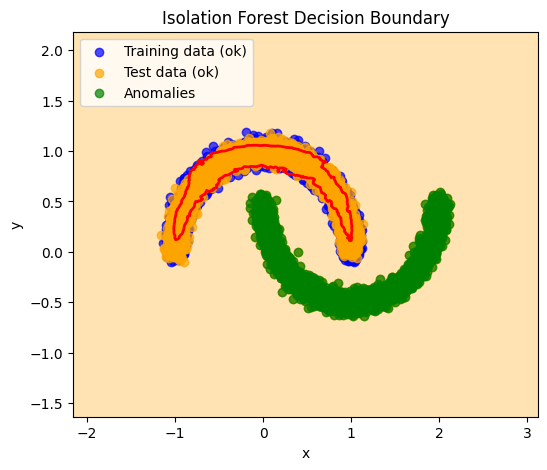

In [12]:
import numpy as np
from models.isolation_forest_model import IsolationForestModel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, test_ground_truth are already defined from your data.
# For example:
# X_train, X_test, test_ground_truth = make_data()
X_train, X_test, test_ground_truth = make_data()

# Split X_test into a final test set and a validation set
#    We'll reserve 20% of X_test for validation and use the remaining 80% as the final test set.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, test_ground_truth, 
    test_size=0.2, 
    random_state=42
)

# Instantiate the Isolation Forest model
iso_forest = IsolationForestModel(
    n_estimators=100,
    max_samples='auto',
    contamination=0.2,
    random_state=42
)

# Train the model on training data
iso_forest.fit(X_train)

# Predict and Evaluate on the Final Test Set
y_pred_test = iso_forest.predict(X_test)
metrics_test = iso_forest.evaluate(X_test, y_test)
print("Isolation Forest Test Metrics:")
for k, v in metrics_test.items():
    print(f"{k}: {v:.3f}")

# Predict and Evaluate on the Validation Set
y_pred_val = iso_forest.predict(X_val)
metrics_val = iso_forest.evaluate(X_val, y_val)
print("Isolation Forest Validation Metrics:")
for k, v in metrics_val.items():
    print(f"{k}: {v:.3f}")

# Visualization: Plot the decision boundary on the final test set
# Determine outlier indices based on ground truth in the test set
outlier_mask = (y_test == -1)

# Plot decision boundary using the test set
iso_forest.plot_decision_boundary(X_train, X_test=X_test, X_outliers=X_test[outlier_mask])


 One-Class SVM and LOF, normalization could improve performance. Try using StandardScaler() or MinMaxScaler()

From a **machine learning and statistical** standpoint, your approach is generally solid—especially now that you’re:

- Splitting data into **training**, **validation**, and **test** sets,
- **Normalizing** when appropriate (for LOF or One-Class SVM),
- Doing **hyperparameter tuning** (GridSearchCV, PredefinedSplit, etc.),
- Evaluating on **unseen test data** to confirm performance.

That said, here are some **possible refinements** to take your anomaly detection pipeline to the next level:

---

## 1. **Multiple Validation Splits or Cross-Validation**

- **Current Approach:** You’re using a single validation split to pick hyperparameters, then testing on a final hold-out set.
- **Potential Improvement:**  
  - Use **cross-validation** (or repeated splits) on your combined “train + val” sets, especially for small or complex data.  
  - Even if your dataset is large, K-Fold cross-validation can give a more robust estimate of how model hyperparameters generalize.

---

## 2. **Threshold Tuning / Score-based Approaches**

- **Why?** Some anomaly detection algorithms (like One-Class SVM or LOF in novelty mode) yield **scores** that can be thresholded for outlier decisions.
- **Benefit:** If you want to push for higher precision (or recall), you can adjust the decision threshold.  
- **Approach:**  
  - Collect anomaly scores (`decision_function` in SVM, `score_samples` in LOF with novelty=True).  
  - Plot an ROC or Precision-Recall curve to find the best trade-off threshold for your specific cost or performance preferences.

---

## 3. **Advanced Metrics & Visualizations**

- **Beyond F1:**  
  - Consider generating **confusion matrices** or **precision-recall curves**.  
  - Plot an **ROC curve** (if you interpret anomaly scores vs. ground truth).  
- **Why?** This can give more insight into how well your model separates anomalies from normal points across different thresholds, not just one default cut.

---

## 4. **Exploring Model Ensembles or Other Methods**

- **If Needed:** If your problem is especially tricky or you want higher robustness, you might combine results from multiple algorithms:
  - **Voting** or **stacking** anomalies from One-Class SVM, Isolation Forest, LOF, etc.
- **Benefit:** Sometimes an ensemble of anomaly detectors can reduce false positives or false negatives.

---

## 6. **Document & Automate**

- Ensure that your pipeline is **well-documented** and that you can easily reproduce results:
  - Keep track of random seeds (you are doing so with e.g. `random_state=42`).
  - Use **GitHub Actions** or any CI to automate repeated tests or generate updated results automatically.

---

### **Summary**

You aren’t doing anything “wrong.” Your approach is quite standard and correct for semi-supervised anomaly detection. Still, you can **enhance** it with additional validation splits, threshold tuning, advanced metrics (AUC/PR), potential ensemble methods, and domain-specific checks to get more robust and interpretable results.